<a href="https://colab.research.google.com/github/jw9603/ECE5402_41/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd ./drive/MyDrive/패턴인식론

/content/drive/MyDrive/패턴인식론


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips['total_bill'].shape

(244,)

In [ ]:
def kernel_function(kernel, u):
    if kernel == 'normal':
        return normal_kernel(u)
    elif kernel == 'uniform':
        return uniform_kernel(u)
    elif kernel == 'triangular':
        return triangular_kernel(u)
    elif kernel == 'epanechnikov':
        return epanechnikov_kernel(u)
    elif kernel == 'quartic':
        return quartic_kernel(u)
    elif kernel == 'triweight':
        return triweight_kernel(u)
    elif kernel == 'tricube':
        return tricube_kernel(u)
    elif kernel == 'cosine':
        return cosine_kernel(u)
    else: 
        print("[ERROR] Incorrect Kernel Function Name")

def normal_kernel(u):
    return np.exp(-(np.abs(u)**2)/2)/(h*np.sqrt(2*np.pi))

def uniform_kernel(u):
    return np.where(np.abs(u)<=1,1,0)/2

def triangular_kernel(u):
    return (1-np.abs(u))*np.where(np.abs(u)<=1,1,0)

def epanechnikov_kernel(u):
    return (3*(1-u**2)*np.where(np.abs(u)<=1,1,0))/4

def quartic_kernel(u):
    return ((15*((1-u**2)**2))*np.where(np.abs(u)<=1,1,0))/16

def triweight_kernel(u):
    return ((35*((1-u**2)**3))*np.where(np.abs(u)<=1,1,0))/32

def tricube_kernel(u):
    return ((70*((1-np.abs(u)**3)**3))*np.where(np.abs(u)<=1,1,0))/81

def cosine_kernel(u):
    return (np.pi*np.cos(np.pi*u/2)*np.where(np.abs(u)<=1,1,0)/2)/4

### 1. 새벽사진의 분포(1D : R, G, B)

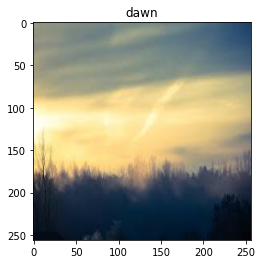

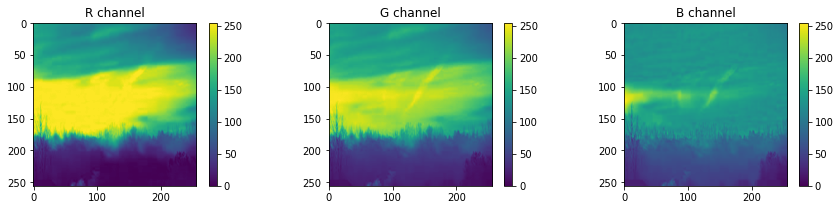

In [ ]:
# 새벽
img0 = cv2.imread('dawn.png')
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
plt.title('dawn')
img0 = cv2.resize(img0,(256,256))
plt.imshow(img0)
r_0 = img0[:,:,0]
g_0 = img0[:,:,1]
b_0 = img0[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()

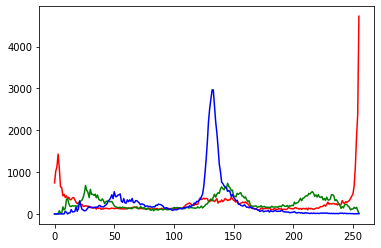

In [ ]:
rgb_planes = cv2.split(img0)

colors = ['r', 'g', 'b']
for (p, c) in zip(rgb_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


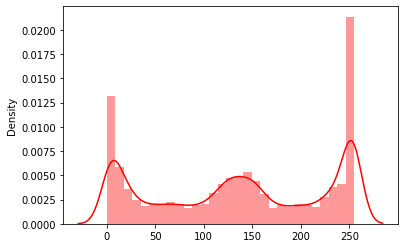

In [ ]:
import seaborn as sns
sns.distplot(r_0,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


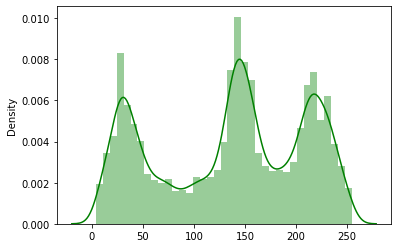

In [ ]:
import seaborn as sns
sns.distplot(g_0,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


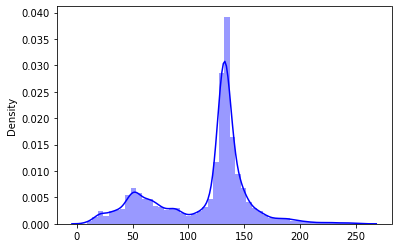

In [ ]:
import seaborn as sns
sns.distplot(b_0,color='blue')

In [ ]:
r_0 = r_0.reshape(-1,1)
g_0 = g_0.reshape(-1,1)
b_0 = b_0.reshape(-1,1)
rg0 = np.concatenate((r_0,g_0),axis=1)
gb0 = np.concatenate((g_0,b_0),axis=1)
rb0 = np.concatenate((r_0,b_0),axis=1)
print(rg0.shape)

(65536, 2)


Text(0.5, 1.03, 'No Kde Red & Green')

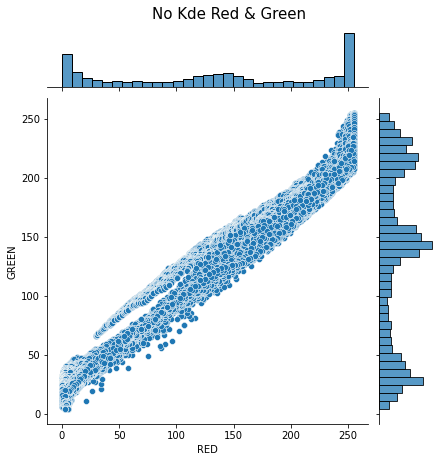

In [ ]:
j1 = sns.jointplot(x=rg0[:,0],y=rg0[:,1],data=rg0)

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('No Kde Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Green')

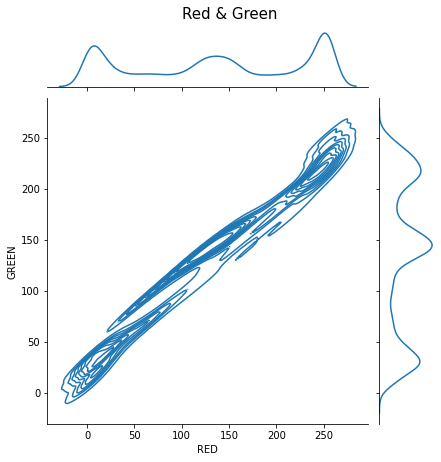

In [ ]:
j1 = sns.jointplot(x=rg0[:,0],y=rg0[:,1],data=rg0,kind='kde')

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Red & Blue')

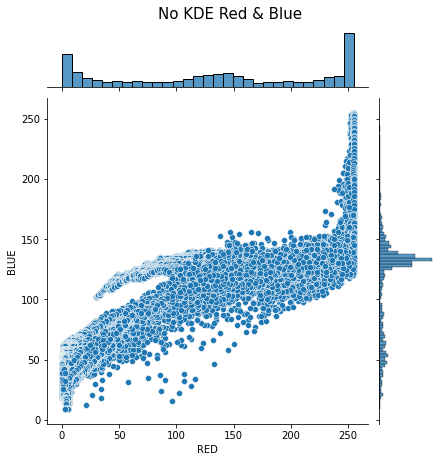

In [ ]:
j2 = sns.jointplot(x=rb0[:,0],y=rb0[:,1],data=rb0)

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('No KDE Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Blue')

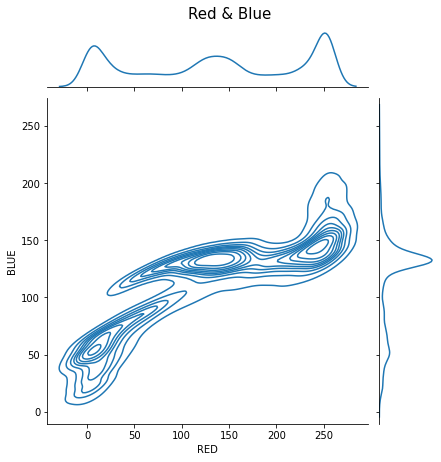

In [ ]:
j2 = sns.jointplot(x=rb0[:,0],y=rb0[:,1],data=rb0,kind='kde')

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Green & Blue')

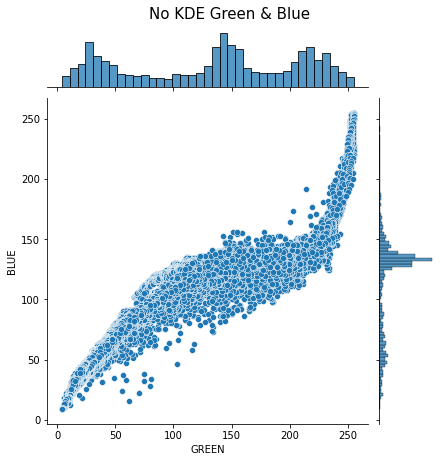

In [ ]:
j3 = sns.jointplot(x=gb0[:,0],y=gb0[:,1],data=gb0)

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('No KDE Green & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Green & Blue')

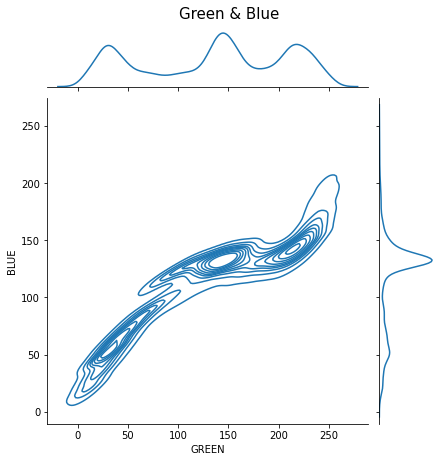

In [ ]:
j3 = sns.jointplot(x=gb0[:,0],y=gb0[:,1],data=gb0,kind='kde')

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('Green & Blue',fontsize=15,y=1.03)

### 2. 아침사진의 분포(1D : R, G, B)

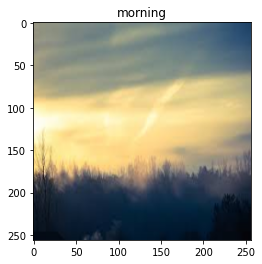

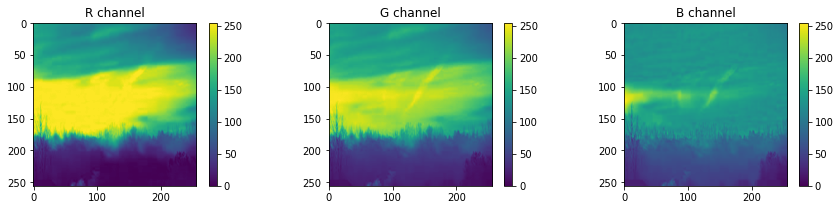

In [ ]:
# 아침
img1 = cv2.imread('morn.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.title('morning')
img1 = cv2.resize(img1,(256,256))
plt.imshow(img1)
r_1 = img1[:,:,0]
g_1 = img1[:,:,1]
b_1 = img1[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()

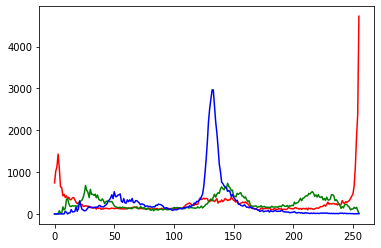

In [ ]:
rgb_planes = cv2.split(img1)

colors = ['r', 'g', 'b']
for (p, c) in zip(rgb_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


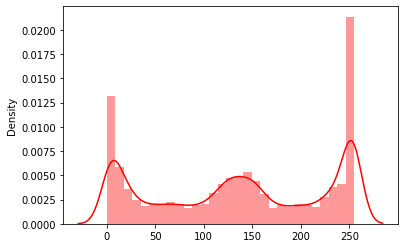

In [ ]:
import seaborn as sns
sns.distplot(r_1,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


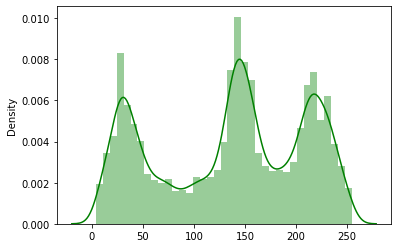

In [ ]:
import seaborn as sns
sns.distplot(g_1,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


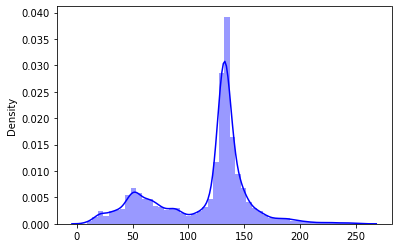

In [ ]:
import seaborn as sns
sns.distplot(b_1,color='blue')

In [ ]:
r_1 = r_1.reshape(-1,1)
g_1 = g_1.reshape(-1,1)
b_1 = b_1.reshape(-1,1)
rg1 = np.concatenate((r_1,g_1),axis=1)
gb1 = np.concatenate((g_1,b_1),axis=1)
rb1 = np.concatenate((r_1,b_1),axis=1)
print(rg1.shape)

(65536, 2)


Text(0.5, 1.03, 'No KDE Red & Green')

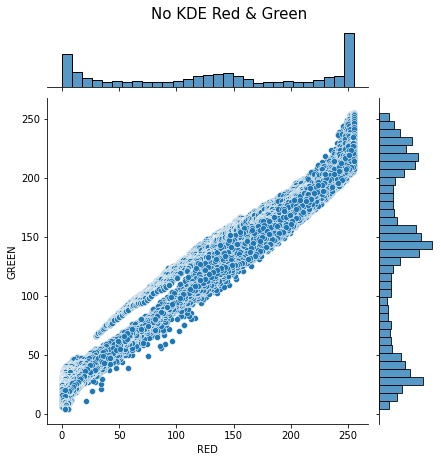

In [ ]:
j1 = sns.jointplot(x=rg1[:,0],y=rg1[:,1],data=rg1)

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('No KDE Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Green')

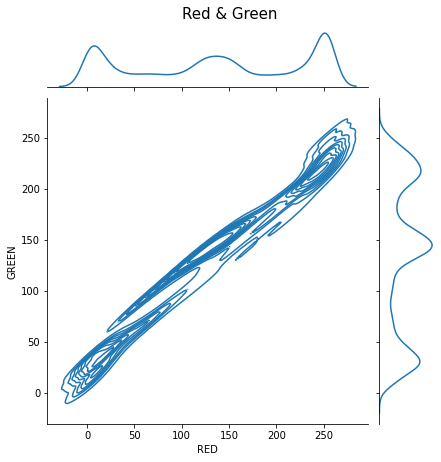

In [ ]:
j1 = sns.jointplot(x=rg1[:,0],y=rg1[:,1],data=rg1,kind='kde')

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Red & Blue')

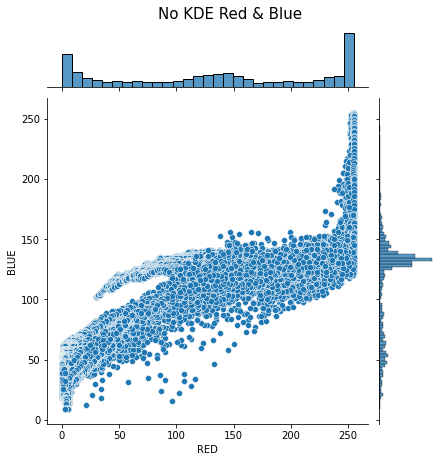

In [ ]:
j2 = sns.jointplot(x=rb1[:,0],y=rb1[:,1],data=rb1)

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('No KDE Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Blue')

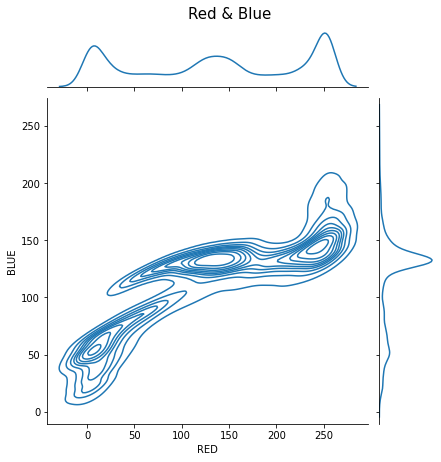

In [ ]:
j2 = sns.jointplot(x=rb1[:,0],y=rb1[:,1],data=rb1,kind='kde')

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Green & Blue')

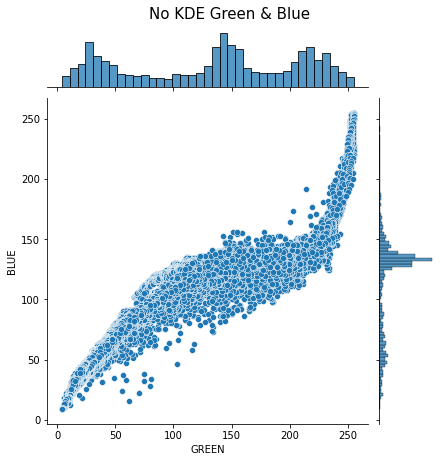

In [ ]:
j3 = sns.jointplot(x=gb1[:,0],y=gb1[:,1],data=gb1)

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('No KDE Green & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Green & Blue')

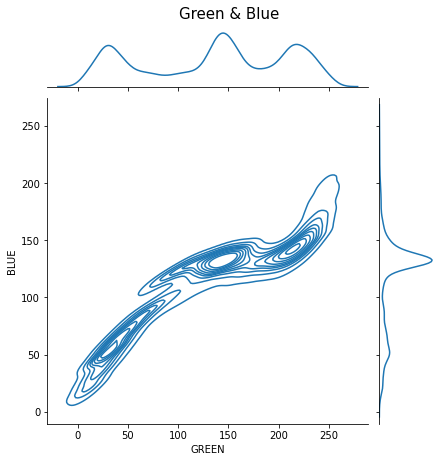

In [ ]:
j3 = sns.jointplot(x=gb1[:,0],y=gb1[:,1],data=gb1,kind='kde')

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('Green & Blue',fontsize=15,y=1.03)

### 3. 오후사진의 분포(1D : R, G, B)

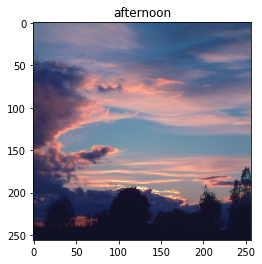

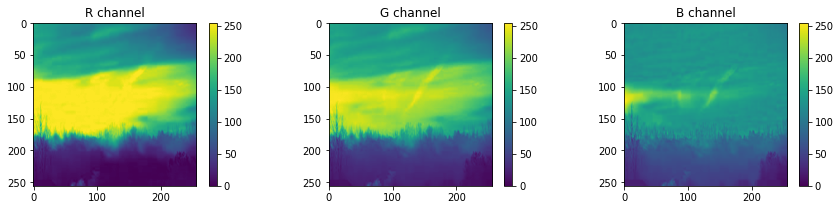

In [ ]:
img2 = cv2.imread('afternoon.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.title('afternoon')
img2 = cv2.resize(img2,(256,256))
plt.imshow(img2)
r_2 = img2[:,:,0]
g_2 = img2[:,:,1]
b_2 = img2[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()

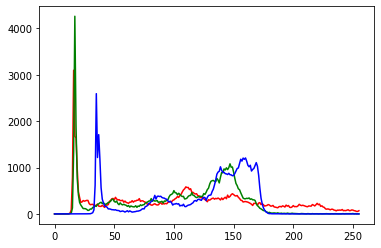

In [ ]:
rgb_planes = cv2.split(img2)

colors = ['r', 'g', 'b']
for (p, c) in zip(rgb_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


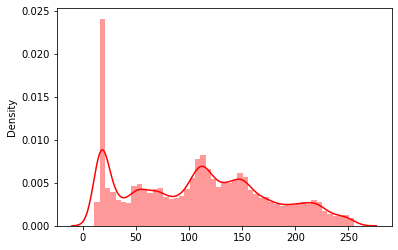

In [ ]:
import seaborn as sns
sns.distplot(r_2,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


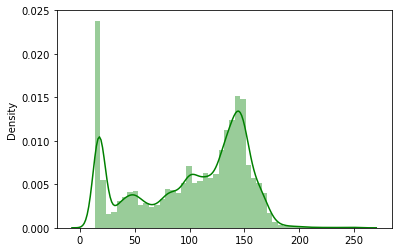

In [ ]:
import seaborn as sns
sns.distplot(g_2,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


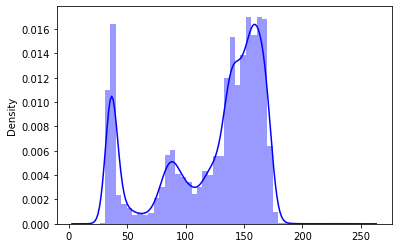

In [ ]:
import seaborn as sns
sns.distplot(b_2,color='blue')

In [ ]:
r_2 = r_2.reshape(-1,1)
g_2 = g_2.reshape(-1,1)
b_2 = b_2.reshape(-1,1)
rg2 = np.concatenate((r_2,g_2),axis=1)
gb2 = np.concatenate((g_2,b_2),axis=1)
rb2 = np.concatenate((r_2,b_2),axis=1)
print(rg2.shape)

(65536, 2)


Text(0.5, 1.03, 'No KDE Red & Green')

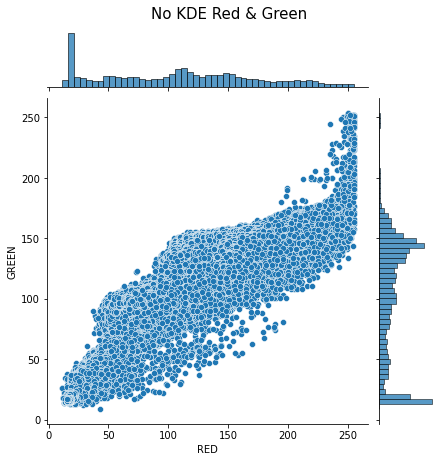

In [ ]:
j1 = sns.jointplot(x=rg2[:,0],y=rg2[:,1],data=rg2)

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('No KDE Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Green')

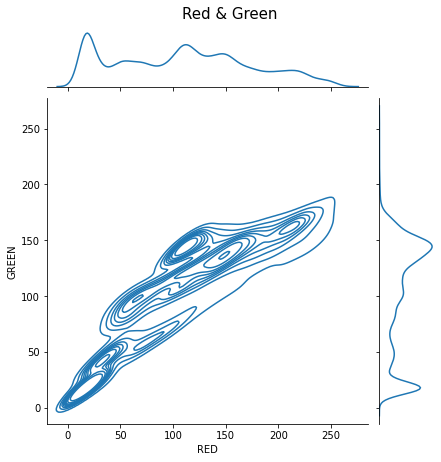

In [ ]:
j1 = sns.jointplot(x=rg2[:,0],y=rg2[:,1],data=rg2,kind='kde')

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Red & Blue')

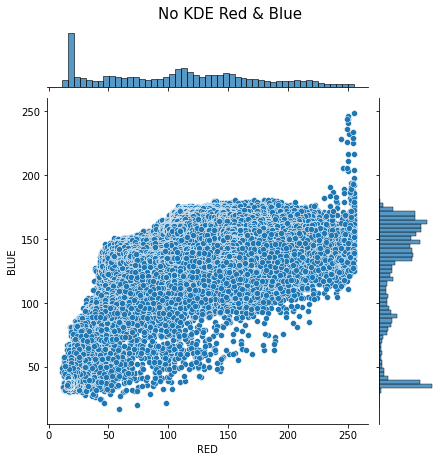

In [ ]:
j2 = sns.jointplot(x=rb2[:,0],y=rb2[:,1],data=rb2)

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('No KDE Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Blue')

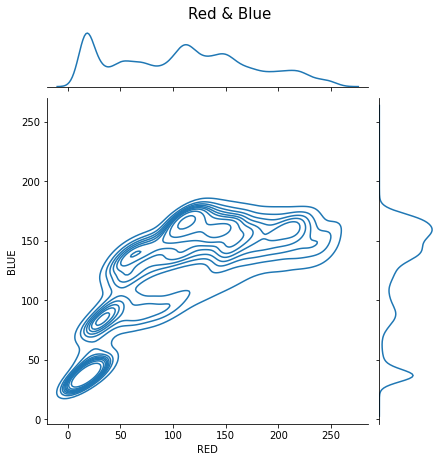

In [ ]:
j2 = sns.jointplot(x=rb2[:,0],y=rb2[:,1],data=rb2,kind='kde')

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Green & Blue')

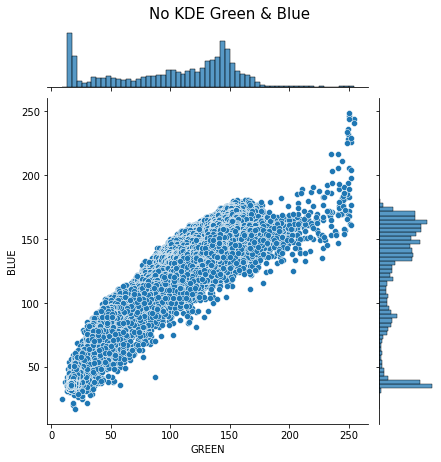

In [ ]:
j3 = sns.jointplot(x=gb2[:,0],y=gb2[:,1],data=gb2)

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('No KDE Green & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Green & Blue')

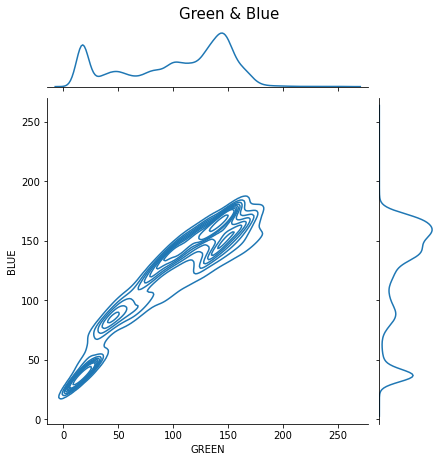

In [ ]:
j3 = sns.jointplot(x=gb2[:,0],y=gb2[:,1],data=gb2,kind='kde')

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('Green & Blue',fontsize=15,y=1.03)

### 4. 밤사진의 분포

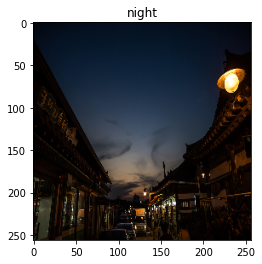

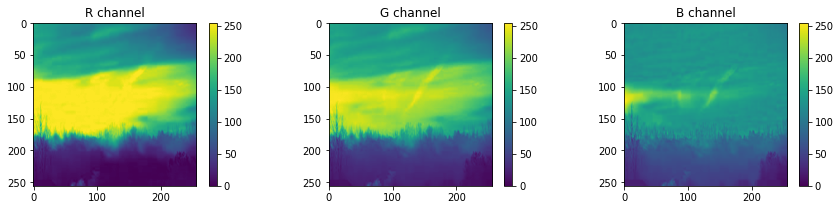

In [ ]:
# 밤
img3 = cv2.imread('night.png')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.title('night')
img3 = cv2.resize(img3,(256,256))
plt.imshow(img3)
r_3 = img3[:,:,0]
g_3 = img3[:,:,1]
b_3 = img3[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(img0[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title(f'{c} channel')

plt.show()

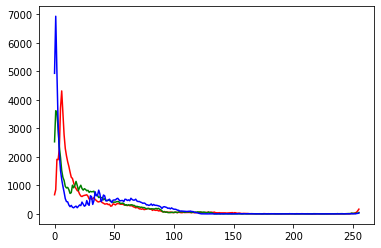

In [ ]:
rgb_planes = cv2.split(img3)

colors = ['r', 'g', 'b']
for (p, c) in zip(rgb_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


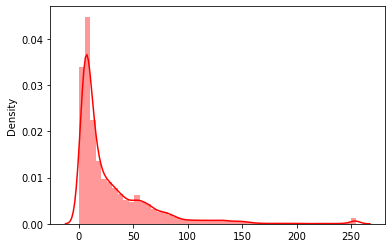

In [ ]:
import seaborn as sns
sns.distplot(r_3,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


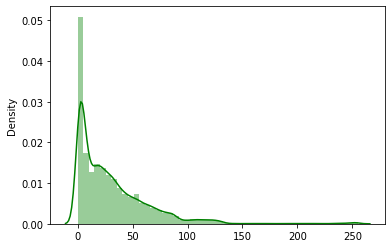

In [ ]:
import seaborn as sns
sns.distplot(g_3,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


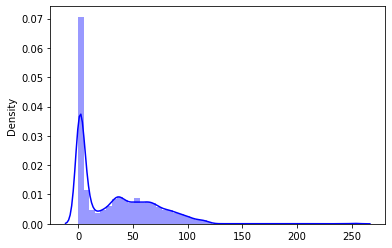

In [ ]:
import seaborn as sns
sns.distplot(b_3,color='blue')

In [ ]:
r_3 = r_3.reshape(-1,1)
g_3 = g_3.reshape(-1,1)
b_3 = b_3.reshape(-1,1)
rg3 = np.concatenate((r_3,g_3),axis=1)
gb3 = np.concatenate((g_3,b_3),axis=1)
rb3 = np.concatenate((r_3,b_3),axis=1)
print(rg3.shape)

(65536, 2)


Text(0.5, 1.03, 'No KDE Red & Green')

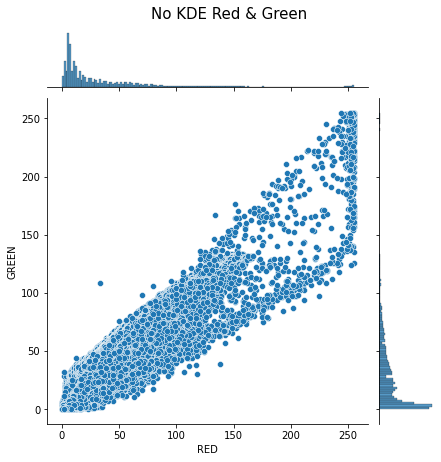

In [ ]:
j1 = sns.jointplot(x=rg3[:,0],y=rg3[:,1],data=rg3)

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('No KDE Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Green')

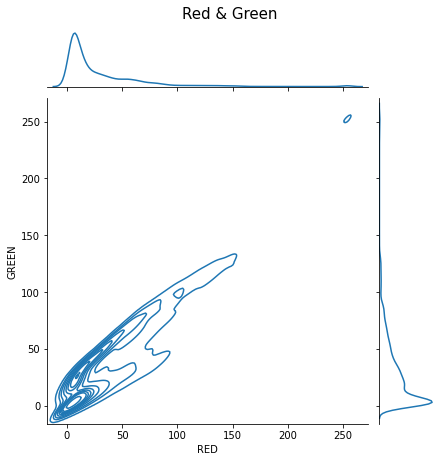

In [ ]:
j1 = sns.jointplot(x=rg3[:,0],y=rg3[:,1],data=rg3,kind='kde')

j1.set_axis_labels(xlabel='RED',ylabel='GREEN')
j1.fig.suptitle('Red & Green',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Red & Blue')

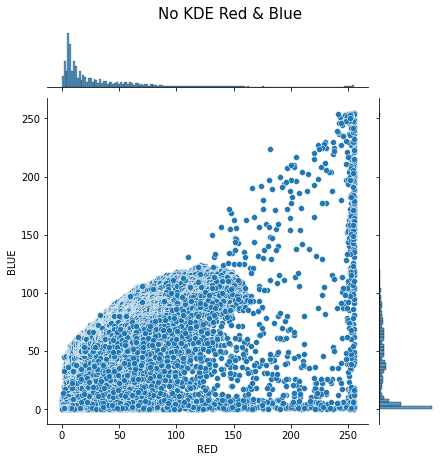

In [ ]:
j2 = sns.jointplot(x=rb3[:,0],y=rb3[:,1],data=rb3)

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('No KDE Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Red & Blue')

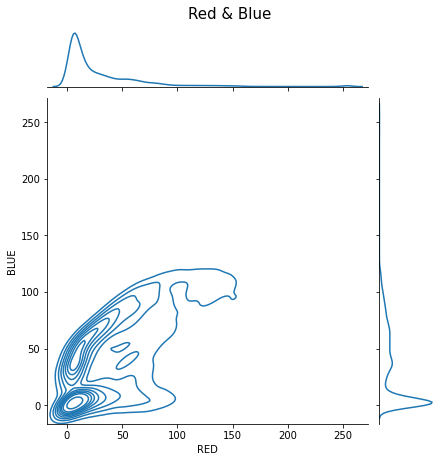

In [ ]:
j2 = sns.jointplot(x=rb3[:,0],y=rb3[:,1],data=rb3,kind='kde')

j2.set_axis_labels(xlabel='RED',ylabel='BLUE')
j2.fig.suptitle('Red & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'No KDE Green & Blue')

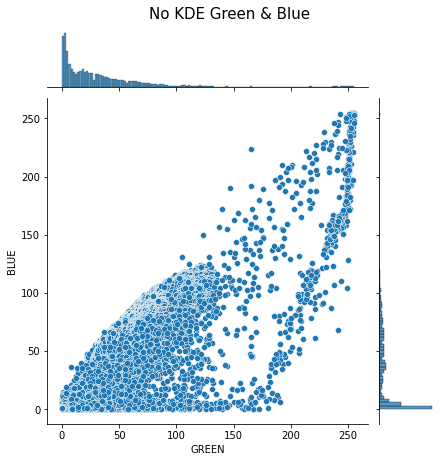

In [ ]:
j3 = sns.jointplot(x=gb3[:,0],y=gb3[:,1],data=gb3)

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('No KDE Green & Blue',fontsize=15,y=1.03)

Text(0.5, 1.03, 'Green & Blue')

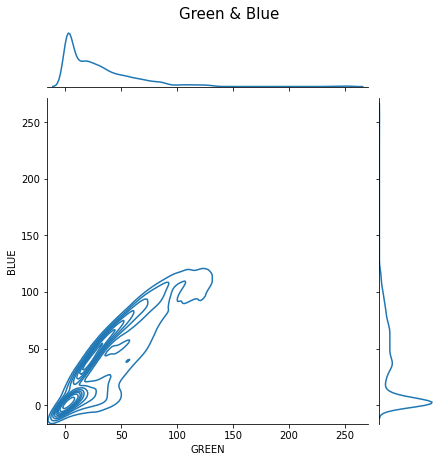

In [ ]:
j3 = sns.jointplot(x=gb3[:,0],y=gb3[:,1],data=gb3,kind='kde')

j3.set_axis_labels(xlabel='GREEN',ylabel='BLUE')
j3.fig.suptitle('Green & Blue',fontsize=15,y=1.03)